<a href="https://colab.research.google.com/github/Sandeshbabar/DSBDALab/blob/main/DSBDAASS05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from matplotlib.colors import ListedColormap

In [6]:
np.random.seed(42)
age = np.random.randint(18, 60, 100)
estimated_salary = np.random.randint(25000, 100000, 100)
purchased = np.random.choice([0, 1], size=100)
df = pd.DataFrame({
    'Age': age,
    'EstimatedSalary': estimated_salary,
    'Purchased': purchased
})

In [7]:
print("Null Values:\n", df.isnull().sum())

cov_matrix = df.cov()
print("\nCovariance Matrix:\n", cov_matrix)


Null Values:
 Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Covariance Matrix:
                           Age  EstimatedSalary    Purchased
Age                149.315051     1.001509e+04    -0.493636
EstimatedSalary  10015.090808     4.849604e+08 -1591.527980
Purchased           -0.493636    -1.591528e+03     0.247576


In [8]:
X = df[['Age', 'EstimatedSalary']]
Y = df['Purchased']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)


Training Accuracy: 0.6125

Testing Accuracy: 0.4

Confusion Matrix:
 [[ 1 10]
 [ 2  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.09      0.14        11
           1       0.41      0.78      0.54         9

    accuracy                           0.40        20
   macro avg       0.37      0.43      0.34        20
weighted avg       0.37      0.40      0.32        20


Precision Score: 0.4117647058823529

Recall Score: 0.7777777777777778


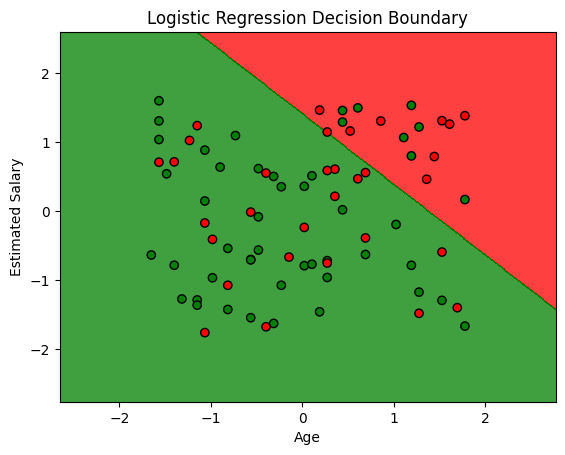

In [10]:
print("\nTraining Accuracy:", accuracy_score(Y_train, y_train_pred))
print("\nTesting Accuracy:", accuracy_score(Y_test, y_test_pred))

print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_test_pred))

print("\nPrecision Score:", precision_score(Y_test, y_test_pred))
print("\nRecall Score:", recall_score(Y_test, y_test_pred))

X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, logreg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')), edgecolors='k')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()
